<a href="https://colab.research.google.com/github/nhanhd06/assignment_7/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install apyori
!pip install mlxtend --upgrade

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=55c0a43e81e2ce7cce52802c18b0443ab097df477c160c6218f39183325f740d
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori
     |████████████████████████████████| 1.3 MB 11.7 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [25]:
# Importing packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from apyori import apriori
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [27]:
! wget https://github.com/shivang98/Market-Basket-Optimization/blob/master/Market_Basket_Optimisation.csv

--2021-12-11 07:33:20--  https://github.com/shivang98/Market-Basket-Optimization/blob/master/Market_Basket_Optimisation.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Market_Basket_Optimisation.csv’

Market_Basket_Optim     [ <=>                ]   1.99M  --.-KB/s    in 0.06s   

2021-12-11 07:33:20 (33.7 MB/s) - ‘Market_Basket_Optimisation.csv’ saved [2088013]



In [4]:
store_data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
display(store_data.head())
print(store_data.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(7501, 20)


In [ ]:
# ====Apriori Algorithm====

In [ ]:
records = []
for i in range(1, 7501):
    records.append([str(store_data.values[i, j]) for j in range(0, 20)])
print(type(records))

<class 'list'>


In [ ]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [ ]:
print("There are {} Relation derived.".format(len(association_results)))

There are 48 Relation derived.


In [ ]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: light cream -> chicken
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: mushroom cream sauce -> escalope
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
Rule: pasta -> escalope
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: ground beef -> herb & pepper
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
Rule: ground beef -> tomato sauce
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
Rule: olive oil -> whole wheat pasta
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
Rule: pasta -> shrimp
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151
Rule: light cream -> chicken
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: frozen vegetables -> shrimp
Support: 0.005333333333333333
Confidence: 0.23255813953488372


In [ ]:
# ====Classic Gradient Boosting Method====

In [24]:
data = load_iris()
x = data.data
y = data.target
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)
gradient_boosting=GradientBoostingClassifier(random_state=0, max_depth=1)
gradient_boosting.fit(x_train,y_train)
print("Accuracy on training: " + str(gradient_boosting.score(x_train,y_train)))
print("Accuracy on testing: " + str(gradient_boosting.score(x_test,y_test)))

Accuracy on training: 1.0
Accuracy on testing: 0.9736842105263158


In [ ]:
# ====Fpgrowth Algorithm====

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [ ]:
fpgrowth(df, min_support=0.6)

,support,itemsets
0,1.0,(77)


In [ ]:
fpgrowth(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Yogurt, Kidney Beans)"
7,0.6,"(Onion, Eggs)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Onion, Eggs, Kidney Beans)"


In [ ]:
# ====Kmeans Algorithm====

In [ ]:
data = load_iris()
x = pd.DataFrame(data.data, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
y = pd.DataFrame(data.target, columns=['Target_Names'])
pedal_set = pd.DataFrame(x.Petal_Length)
pedal_set['Pedal_Width'] = pd.DataFrame(x.Petal_Width)
k_mean = KMeans(n_clusters=3)
k_mean_pedal_set = k_mean.fit_predict(pedal_set)
pedal_set['Cluster'] = k_mean_pedal_set
pedal_set.head()

,Petal_Length,Pedal_Width,Cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


Text(0.5, 1.0, 'K Means Petal Length vs Petal Width')

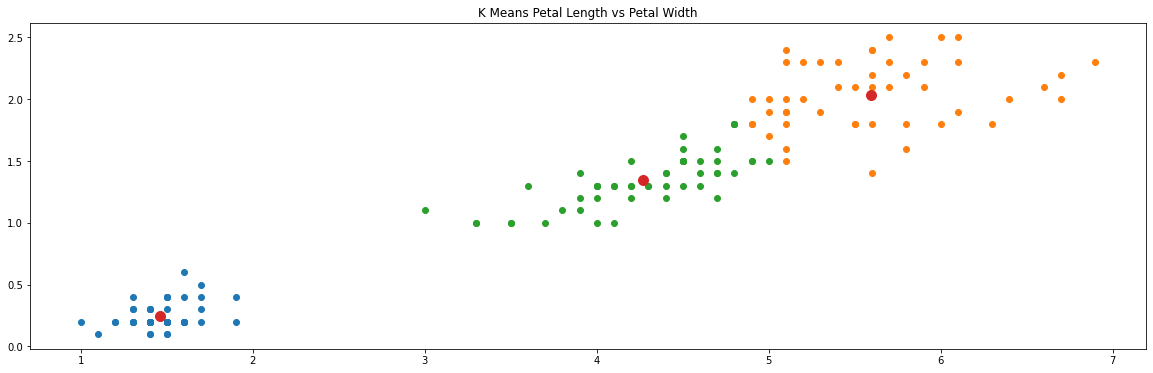

In [ ]:
plt.figure(figsize=(20,6))

df1 = pedal_set[pedal_set.Cluster==0]
df2 = pedal_set[pedal_set.Cluster==1]
df3 = pedal_set[pedal_set.Cluster==2]

plt.scatter(df1['Petal_Length'],df1['Pedal_Width'])
plt.scatter(df2['Petal_Length'],df2['Pedal_Width'])
plt.scatter(df3['Petal_Length'],df3['Pedal_Width'])
plt.scatter(k_mean.cluster_centers_[:, 0], k_mean.cluster_centers_[:,1], s=100)
plt.title('K Means Petal Length vs Petal Width')

In [ ]:
# ====Decision Trees====

In [17]:
data = load_iris()
x = data.data
y = data.target
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 50, test_size = 0.25)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
print("Accuracy on training: " + str(accuracy_score(y_true = y_train, y_pred=decision_tree.predict(x_train))))
print("Accuracy on testing: " + str(accuracy_score(y_true = y_test, y_pred=y_pred)))

Accuracy on training: 1.0
Accuracy on testing: 0.9473684210526315


In [ ]:
# ====Random Forest====

In [20]:
data = load_iris()
x = data.data
y = data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print("Accuracy on training: " + str(accuracy_score(y_true = y_train, y_pred=random_forest.predict(x_train))))
print("Accuracy on testing: " + str(accuracy_score(y_true = y_test, y_pred=y_pred)))

Accuracy on training: 1.0
Accuracy on testing: 0.9111111111111111


In [ ]:
# ===Adaboost Algorithm====

In [22]:
data = load_iris()
x = data.data
y = data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
ada_boost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(x_test)
print("Accuracy on training: " + str(accuracy_score(y_true = y_train, y_pred=ada_boost.predict(x_train))))
print("Accuracy on testing: " + str(accuracy_score(y_true = y_test, y_pred=y_pred)))

Accuracy on training: 0.9714285714285714
Accuracy on testing: 0.9333333333333333
